<a href="https://colab.research.google.com/github/shriram-pophale901/DMVPR/blob/main/ASSG_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()   # Upload Iris.csv file here
print(uploaded)

dataset = pd.read_csv('Iris.csv')
print("✅ Dataset Loaded Successfully\n")
print(dataset.head())

X = dataset.iloc[:, 1:5].values   # SepalLength, SepalWidth, PetalLength, PetalWidth
y = dataset.iloc[:, -1].values    # Species

# Convert categorical target labels into numbers
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Saving Iris.csv to Iris.csv
{'Iris.csv': b'Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species\n1,5.1,3.5,1.4,0.2,Iris-setosa\n2,4.9,3.0,1.4,0.2,Iris-setosa\n3,4.7,3.2,1.3,0.2,Iris-setosa\n4,4.6,3.1,1.5,0.2,Iris-setosa\n5,5.0,3.6,1.4,0.2,Iris-setosa\n6,5.4,3.9,1.7,0.4,Iris-setosa\n7,4.6,3.4,1.4,0.3,Iris-setosa\n8,5.0,3.4,1.5,0.2,Iris-setosa\n9,4.4,2.9,1.4,0.2,Iris-setosa\n10,4.9,3.1,1.5,0.1,Iris-setosa\n11,5.4,3.7,1.5,0.2,Iris-setosa\n12,4.8,3.4,1.6,0.2,Iris-setosa\n13,4.8,3.0,1.4,0.1,Iris-setosa\n14,4.3,3.0,1.1,0.1,Iris-setosa\n15,5.8,4.0,1.2,0.2,Iris-setosa\n16,5.7,4.4,1.5,0.4,Iris-setosa\n17,5.4,3.9,1.3,0.4,Iris-setosa\n18,5.1,3.5,1.4,0.3,Iris-setosa\n19,5.7,3.8,1.7,0.3,Iris-setosa\n20,5.1,3.8,1.5,0.3,Iris-setosa\n21,5.4,3.4,1.7,0.2,Iris-setosa\n22,5.1,3.7,1.5,0.4,Iris-setosa\n23,4.6,3.6,1.0,0.2,Iris-setosa\n24,5.1,3.3,1.7,0.5,Iris-setosa\n25,4.8,3.4,1.9,0.2,Iris-setosa\n26,5.0,3.0,1.6,0.2,Iris-setosa\n27,5.0,3.4,1.6,0.4,Iris-setosa\n28,5.2,3.5,1.5,0.2,Iris-setosa\n29,5

In [ ]:
# Initialize models
models = {
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Train and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append([name, acc, prec, rec, f1])

    print(f"\n📊 Model: {name}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))



📊 Model: AdaBoost
Confusion Matrix:
 [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38


📊 Model: Gradient Boosting
Confusion Matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38


📊 Model: XGBoost
Confusion M

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:12:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔍 Model Performance Comparison:
               Model  Accuracy  Precision    Recall  F1-Score
0           AdaBoost  0.973684   0.975709  0.973684  0.973584
1  Gradient Boosting  1.000000   1.000000  1.000000  1.000000
2            XGBoost  1.000000   1.000000  1.000000  1.000000


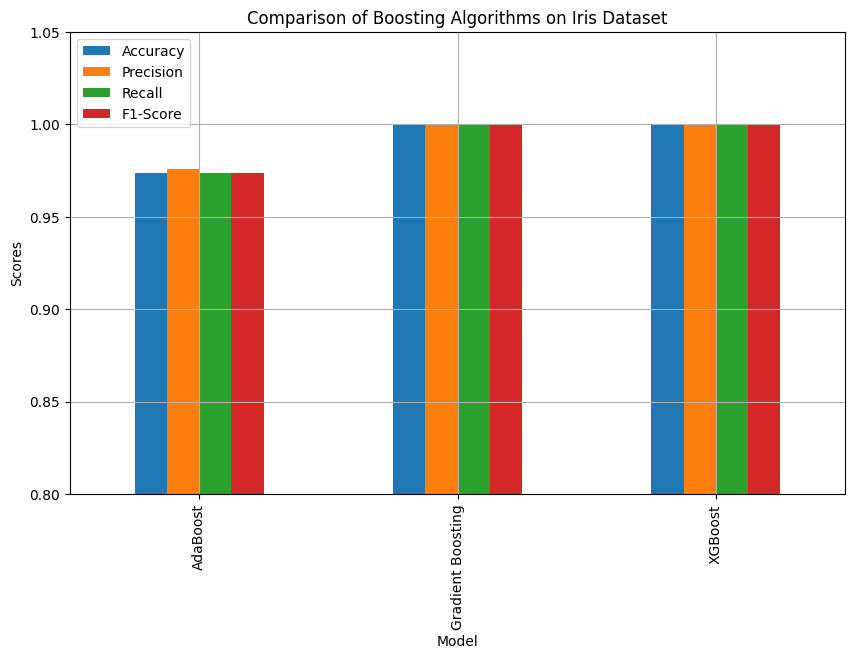

In [ ]:
# Create DataFrame to compare results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print("\n🔍 Model Performance Comparison:")
print(results_df)

# Visual comparison (optional)
import matplotlib.pyplot as plt

results_df.set_index('Model', inplace=True)
results_df.plot(kind='bar', figsize=(10,6))
plt.title('Comparison of Boosting Algorithms on Iris Dataset')
plt.ylabel('Scores')
plt.ylim(0.8, 1.05)
plt.grid(True)
plt.show()
